In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Add_sales_data_2018.csv')

In [3]:
data.head()
#data['Date'] = pd.to_numeric(data['Date'], errors='coerce')

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
# Building regression model from the given data set

y = data['Profit(in Thousands)']
# Removing the Column that has most correlation to reduce MSE
x = data.drop(['Profit(in Thousands)','Date','Add5(in Thousands)'],axis=1)
x.shape

(205, 4)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.3)

In [6]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [7]:
model = lr.fit(x_train,y_train)

In [8]:
predictions = model.predict(x_test)

In [9]:
# Actual Values

print(y_test.sort_values())


16     4175.677
18     4190.965
4      4350.683
5      4404.686
8      4425.005
         ...   
188    5880.541
181    5921.116
189    5938.474
183    5972.337
179    6137.800
Name: Profit(in Thousands), Length: 62, dtype: float64


In [10]:
# Predictions from the available data

print(predictions)

[4493.69340408 5921.03526618 4404.34673354 4191.05040999 5879.95601209
 5728.48105392 5225.38871922 5017.31826292 5518.30422949 4514.52730082
 4464.50263892 5140.4433019  4761.56125757 5037.99982229 4607.67914812
 5731.04121899 4923.32141534 4471.33106375 4480.40545212 5065.87589297
 5043.75035742 5491.6811047  4968.06548686 5793.34474171 6138.38074385
 5247.31087018 5138.09580589 5373.98627467 5213.20798206 4899.4787347
 5971.93140534 5745.23967142 5153.92972207 5805.68506238 4763.75926296
 4176.22373556 5938.88364487 4916.34151196 4524.28713048 5113.34317411
 4648.76098024 4349.42348176 4915.83082166 4934.87570686 5108.54735505
 5167.72726922 4451.7249971  4980.07748345 5177.4967423  5861.52660525
 4425.00407463 4887.30986579 5267.34454417 5088.66288404 5163.14662419
 5430.72220132 5250.98115886 5435.45041636 5134.75460393 4436.02066257
 4598.57812724 4979.18677232]


In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
print('MSE is', mean_squared_error(y_test,predictions))

# the MSE is in the sweet spot nearer to 0 ince the Ad Compnay 5 column was dropped due to hgh correlation with Ad Company 4.
# We can say that the the Ad companies 5 and 4 have similar costs for the same dates 
# reccomendation is to stop paying two companies and stick to either 5 or 4 for cost savings.

MSE is 0.21312385408544188


In [13]:
predictiontest = [290,312,309,320]
predictfinal = model.predict([predictiontest])

# Predicting Profit

In [14]:
print(predictfinal)
#Profit Prediction 

[5842.3140534]


In [15]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


<AxesSubplot:>

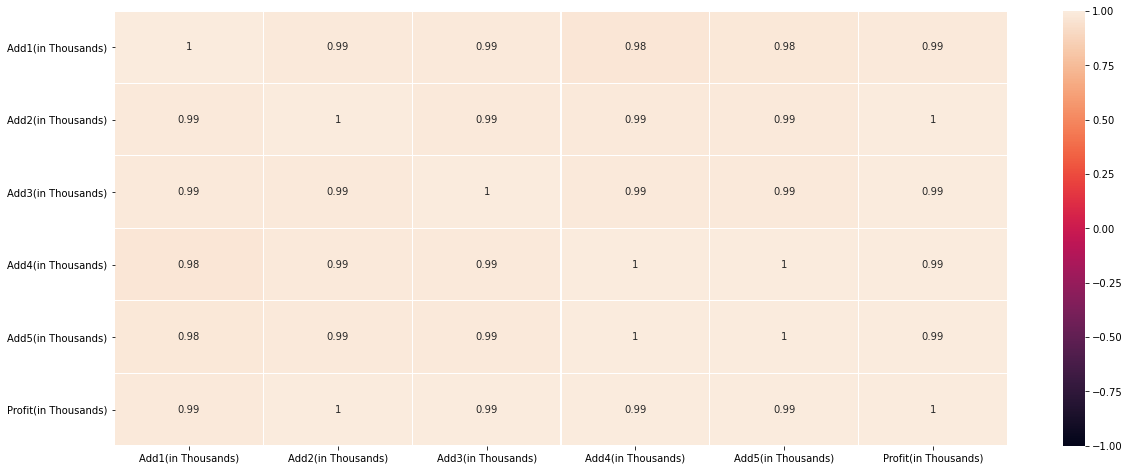

In [20]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=0.2)

# 1. Perfect Correlation Between Add Companies 4 and 5.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'Add1(in Thousands)'),
  Text(1.5, 0, 'Add2(in Thousands)'),
  Text(2.5, 0, 'Add3(in Thousands)'),
  Text(3.5, 0, 'Add4(in Thousands)'),
  Text(4.5, 0, 'Add5(in Thousands)'),
  Text(5.5, 0, 'Profit(in Thousands)')])

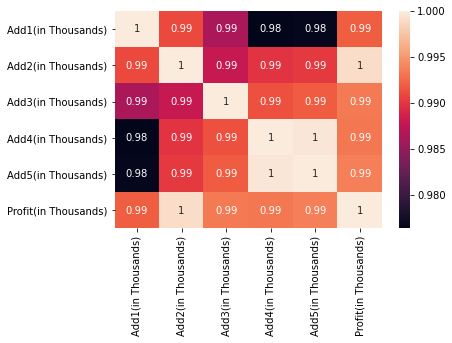

In [51]:
sns.heatmap(data.corr(),annot=True)
plt.xticks(rotation=90)